In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

white = pd.read_csv('../winequality-white.csv', sep=';')
white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [2]:
new_col = ['fixed acidity', 'volatile acidity','residual sugar','chlorides', 
           'total sulfur dioxide', 'density', 'pH', 'alcohol', 'quality']

# removing less correlated columns form dataset
white = white[[c for c in white.columns if c in new_col]]

white.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,8.8,6
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,9.5,6
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,10.1,6
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6


In [3]:
from sklearn.preprocessing import StandardScaler
white_ssc = white.copy()
scaler = StandardScaler().fit(white_ssc[white_ssc.columns[:-1]])
white_ssc[white_ssc.columns[:-1]] = scaler.transform(white_ssc[white_ssc.columns[:-1]])


In [4]:
# clipping top 5 %ile outliers


# selecting only the columns that have > 50% or more deviation from 95%ile to 99%ile
for col in ['chlorides' ]:    
    print(col)
    print('Pre clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('% increase btw 95%ile and 99%ile = ', ((white_ssc[col].quantile(.99) -white_ssc[col].quantile(.95) )/white_ssc[col].quantile(.99))*100)
    print('removing points above 95th percentile')
    white_ssc = white_ssc[white_ssc[col]< white_ssc[col].quantile(.95)]
    print('Post clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('------')

chlorides
Pre clipping  0.9717064373075095 5.228829787443533
% increase btw 95%ile and 99%ile =  81.41636892367472
removing points above 95th percentile
Post clipping  0.5597267582620875 0.7886043577317664
------


In [5]:
white_ssc.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality
count,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000
mean,0.004128,-0.025021,-0.002711,-0.171489,-0.014161,-0.023016,0.023049,0.040460,5.903941
std,1.009493,0.979144,0.983780,0.440406,1.000298,0.981413,0.998298,0.999007,0.886147
min,-3.620351,-1.966985,-1.141944,-1.683274,-3.044230,-2.313038,-3.101408,-2.043297,3.000000
25%,-0.657501,-0.677101,-0.925047,-0.493110,-0.714474,-0.789934,-0.650836,-0.824276,5.000000
50%,-0.064931,-0.180992,-0.234922,-0.172682,-0.126152,-0.126187,-0.054751,-0.092863,6.000000
75%,0.527639,0.414339,0.677030,0.147747,0.673966,0.666295,0.607565,0.719818,6.000000
max,8.705106,8.153643,4.970598,0.925931,7.098444,5.441254,4.184075,2.995326,9.000000


C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: 

C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: 

Optimal number of neighbors is 77


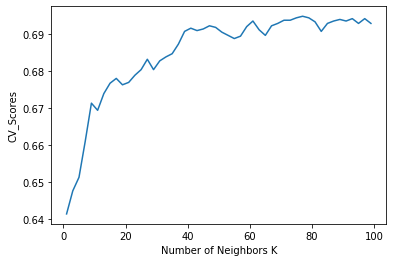

In [12]:
# removing less correlated columns and iterating on above outlier removed dataset
white = white_ssc.copy()

# sampling/shuffling dataset
white = white.sample(frac=1).reset_index(drop=True)

X = white[white.columns[:-1]]
Y = white[white.columns[-1]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbors = list(range(1,100,2))

# iterating over neigbours to get optimal k and using weights = 'distance'
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance') 
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = neighbors[cv_scores.index(max(cv_scores))]
print("Optimal number of neighbors is {}".format(best_k))

plt.plot(neighbors, cv_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("CV_Scores")
plt.show()

In [13]:
## best model using above info

import time
t1 = time.time()

cv_scores = []
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print('Cross val score',scores.mean())

print('Time taken is ', time.time()-t1)


C:\Users\Hamzah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross val score 0.6948132183908046
Time taken is  1.5192461013793945


### Omitting 9 and 3 as class variables

In [14]:
# skipping 9 & 3 as very few datapoints available (0.18% and 0.4% respectively)
white = white[white['quality'] != 9]
white = white[white['quality'] != 3]

Optimal number of neighbors is 85


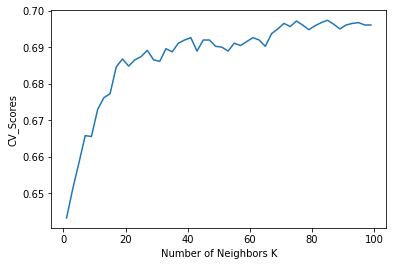

In [15]:
white = white.sample(frac=1).reset_index(drop=True)

X = white[white.columns[:-1]]
Y = white[white.columns[-1]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbors = list(range(1,100,2))

cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = neighbors[cv_scores.index(max(cv_scores))]
print("Optimal number of neighbors is {}".format(best_k))

plt.plot(neighbors, cv_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("CV_Scores")
plt.show()

In [19]:
## best model  not including 9 and 3 as class variable (very less values)

t1 = time.time()

cv_scores = []
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print('Average cross val score', scores.mean())
print('Time taken is ', time.time()-t1)

# get mean confusion matrix over 10 folds
print('Mean confusion matrix \n',conf_matrix_and_cross_val(X,Y,knn))



# no real improvement removing 9 and 3

Average cross val score 0.6974025974025974
Time taken is  1.5348927974700928
Mean confusion matrix 
 [[  1.6   6.8   5.3   1.    0. ]
 [  0.   90.9  40.7   1.4   0. ]
 [  0.   22.4 177.   10.5   0. ]
 [  0.    1.4  38.4  47.3   0. ]
 [  0.    0.2   6.5   4.2   6.4]]


In [17]:
# function to get confusion matrix over K folds during cross val

def conf_matrix_and_cross_val(X,Y,model):

    conf_matrix_list_of_arrays = []
    kf = KFold(n_splits=10)
    kf.get_n_splits(X,Y)

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        knn.fit(X_train, Y_train)
        conf_matrix = confusion_matrix(Y_test, knn.predict(X_test))
        conf_matrix_list_of_arrays .append(conf_matrix)

    mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
    
    return mean_of_conf_matrix_arrays

### Some other attempts performed to increase model accuracy

1. Dimensionality Reduction methods like PCA, LDA and Neighborhood Components Analysis. Didn't really help other than increase  compute time.
   
2. Doing a little research on weighted distances, I came across 'wminkowski' metric in KNN. Tried using it here as we have imbalanced dataset including the weights  There are params for Manhattan and Euclidean distance. Due to paucity of time and my limited knowledge on it, I couldn't get good results from it.

3. Performed a GridSearch CV on possible params in KNN, not good results.